In [3]:
## modules

import pandas as pd
import numpy as np

In [4]:
raw_data = pd.read_csv('./data/october_RAW.csv', parse_dates=['UTC Date/Time'])

raw_data.head()

,Location ID,Location Name,Location Group,Location Type,Sensor ID,Local Date/Time,UTC Date/Time,Channel,PM2.5 (μg/m³) raw,0.3um particle count,...,measure10,measure11,measure12,measure13,measure14,measure15,measure16,measure17,measure18,measure19
0,80169,34b7dad311b4,NaN,Outdoor,airgradient:34b7dad311b4,2025-10-31 23:59:47,2025-10-31 23:59:47+00:00,-,0.0,103.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,80169,34b7dad311b4,NaN,Outdoor,airgradient:34b7dad311b4,2025-10-31 23:58:45,2025-10-31 23:58:45+00:00,-,0.0,96.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80169,34b7dad311b4,NaN,Outdoor,airgradient:34b7dad311b4,2025-10-31 23:57:43,2025-10-31 23:57:43+00:00,-,0.0,108.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80169,34b7dad311b4,NaN,Outdoor,airgradient:34b7dad311b4,2025-10-31 23:56:41,2025-10-31 23:56:41+00:00,-,0.0,125.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80169,34b7dad311b4,NaN,Outdoor,airgradient:34b7dad311b4,2025-10-31 23:55:40,2025-10-31 23:55:40+00:00,-,0.0,101.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='UTC Date/Time'>

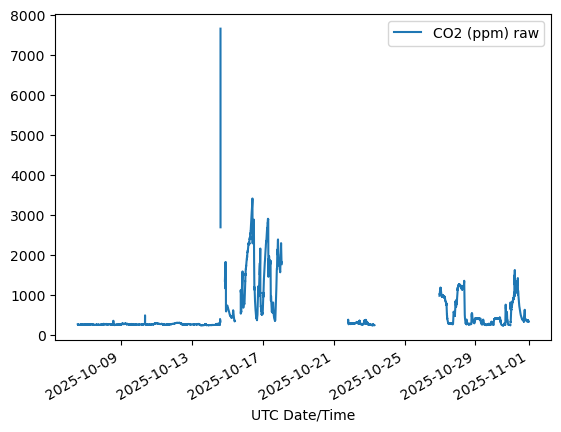

In [9]:
## select useful columns
raw_data = raw_data[[
    'UTC Date/Time',
    'CO2 (ppm) raw'
]]

raw_data['UTC Date/Time'] = raw_data['UTC Date/Time'].dt.tz_localize(None)
raw_data.plot(x='UTC Date/Time', y='CO2 (ppm) raw')

<Axes: xlabel='UTC Date/Time'>

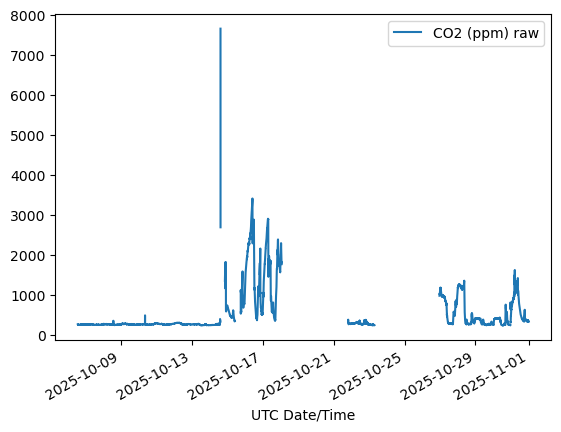

In [10]:
## 1: snapping (rounding) to nearest minute

rounded_data = raw_data.copy()

rounded_data['UTC Date/Time'] = rounded_data['UTC Date/Time'].dt.round(freq='min')

## plot
rounded_data.plot(x='UTC Date/Time', y='CO2 (ppm) raw')

<Axes: xlabel='UTC Date/Time'>

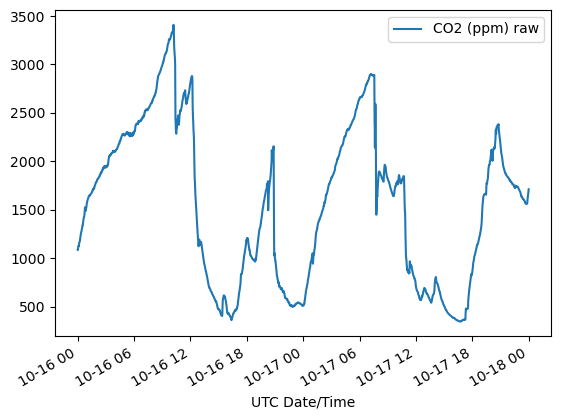

In [27]:
start_date = pd.Timestamp(2025, 10, 16)
end_date = start_date + pd.Timedelta(days=2) # pd.Timestamp(2025, 10, 15)

date_mask = (rounded_data['UTC Date/Time'] >= start_date) & (rounded_data['UTC Date/Time'] <= end_date)

cut_data = rounded_data[date_mask]
cut_data.plot(x='UTC Date/Time', y='CO2 (ppm) raw')

In [ ]:
pairs = [
    (pd.Timestamp(2025, 10, 13, 9), pd.Timestamp(2025, 10, 13, 14))
]

<Axes: xlabel='UTC Date/Time'>

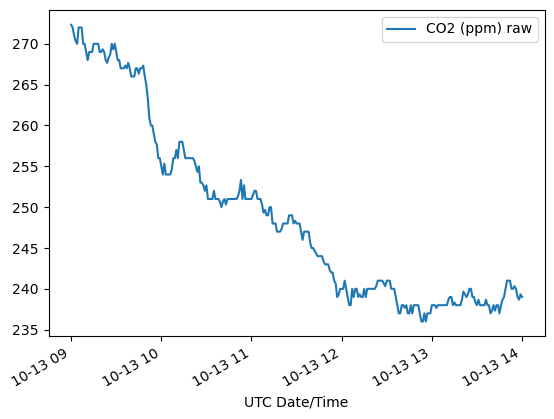

In [ ]:
start_date = pd.Timestamp(2025, 10, 15, 9)
end_date = pd.Timestamp(2025, 10, 13, 14)

date_mask = (rounded_data['UTC Date/Time'] >= start_date) & (rounded_data['UTC Date/Time'] <= end_date)

cut_data = rounded_data[date_mask]
cut_data.plot(x='UTC Date/Time', y='CO2 (ppm) raw')